In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals
import pickle

from Consensus import *
from dynamics import *

In [8]:
def sim_ws(n_probs,N=100, av_degree =6):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0,1,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

        L = nx.laplacian_matrix(GWS)
        L=L.todense()

        CS = Consensus_Simulation(GWS,distributed,L)
        CS.run_sim()

        Time[i] = CS.T[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

In [3]:
def ws_fiedler(n_probs,N=100, av_degree =6):
    F = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0,1,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

        L = nx.laplacian_matrix(GWS)
        L=L.todense()

        v = eigvals(L)
        v=np.delete(v,np.where(v==min(v)))
        F[i]=min(v)
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return F

In [4]:
def sim_ws_rt(n_probs,N=100, av_degree =6):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0.1,0.75,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, 1, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, 1, seed=None)

        L = nx.laplacian_matrix(GWS)
        L=L.todense()

        CS = Consensus_Simulation(GWS,distributed_random_topology,(GWS,p))
        CS.run_sim()

        Time[i] = CS.T[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

In [9]:
def sim_er(n_probs,N=100):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0.1,1,n_probs):
        ER = nx.gnp_random_graph(N, p, seed=None)
        while(not nx.is_connected(ER)):
            ER = nx.gnp_random_graph(N, p, seed=None)
        L = nx.laplacian_matrix(ER)
        L=L.todense()

        CS = Consensus_Simulation(ER,distributed,(L,1))
        CS.run_sim()

        Time[i] = CS.T[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

Iteration done!
Iteration time:  303.27  seconds
Iteration done!
Iteration time:  319.736  seconds
Iteration done!
Iteration time:  258.615  seconds
Iteration done!
Iteration time:  258.767  seconds
Iteration done!
Iteration time:  248.925  seconds
Iteration done!
Iteration time:  296.003  seconds
Iteration done!
Iteration time:  286.541  seconds
Iteration done!
Iteration time:  287.481  seconds
Iteration done!
Iteration time:  289.067  seconds
Iteration done!
Iteration time:  261.866  seconds
Iteration done!
Iteration time:  278.313  seconds
Iteration done!
Iteration time:  236.472  seconds
Iteration done!
Iteration time:  278.195  seconds
Iteration done!
Iteration time:  291.125  seconds
Iteration done!
Iteration time:  287.547  seconds
Iteration done!
Iteration time:  264.569  seconds
Iteration done!
Iteration time:  273.954  seconds
Iteration done!
Iteration time:  267.357  seconds
Iteration done!
Iteration time:  295.424  seconds
Iteration done!
Iteration time:  279.563  seconds
I

NameError: name 'N' is not defined

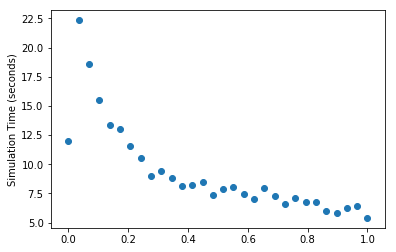

In [3]:
n_iterations=30
n_probs=30
Time = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    Time[i,:] = sim(n_probs)

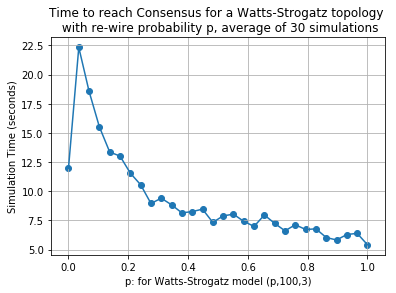

In [10]:
plt.scatter(np.linspace(0,1,len(Time[0])),np.mean(Time,axis=0))
plt.plot(np.linspace(0,1,len(Time[0])),np.mean(Time,axis=0))
plt.ylabel("Simulation Time (seconds)")
plt.xlabel("p: for Watts-Strogatz model (p,{0},{1})".format(100,3))
plt.title("Time to reach Consensus for a Watts-Strogatz topology \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()

plt.savefig("WS-Consensus time",bbpx_inches='tight')

In [15]:
import pickle
Results_ws_30 = {"Time":Time, "Prob": np.linspace(0,1,len(Time[0]))}
pickle.dump(Results_ws_30, open("ws_30","wb"))

In [43]:
D['Time']

array([[12.78732514, 13.56634116, 19.24592113, 15.77626586, 19.69585705,
        18.06884813, 18.43975425, 14.52188587, 10.56291938,  8.46362066,
         4.43223667,  9.10691476,  6.95434952,  8.02074838, 13.6048336 ,
         6.94989347,  8.30785322,  9.97251725,  7.08159828,  7.09461761,
         8.46956134,  4.62225008,  9.190207  ,  5.80669475,  7.8220551 ,
         7.35926723,  6.59870148,  6.69757199,  6.43408799,  7.41771507],
       [14.75333977, 49.14637566, 18.5076158 , 11.79770923, 16.58614445,
        15.71043324, 16.20955324,  7.40252209,  7.65353656, 10.84225154,
         3.85603046,  6.82673597,  7.3347249 , 13.39796519,  6.49146795,
        19.51155186, 10.11587405, 11.11545825, 10.41643405,  9.04098296,
         6.02188134,  6.86664581,  4.20683265,  5.5795877 ,  4.68949652,
        10.47758436,  3.9490664 ,  3.81768346,  4.90076399,  2.26342344],
       [12.1964097 , 32.69556022, 20.03116369,  9.15706944,  8.77603436,
         5.79624701,  9.41029   , 11.01684475, 10

In [54]:
D = pickle.load(open("./Data/ws_30","rb"))
t = np.mean(D['Time'],axis=0)
b,w = np.where(t==min(t)),np.where(t==max(t))
b,w = D['Prob'][b], D['Prob'][w]

In [56]:
w

array([0.03448276])

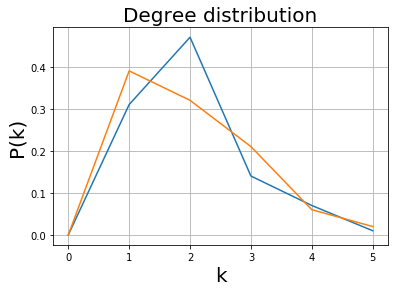

In [96]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

GWS_b = nx.watts_strogatz_graph(100, 3, best, seed=None)
GWS_w = nx.watts_strogatz_graph(100, 3, worst, seed=None)

for G in ([GWS_b,GWS_w]):
    ks, Pk = degree_distribution(G)
    plt.plot(ks, Pk)
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution", fontsize=20)
    plt.grid(True)
plt.show()

In [130]:
def ws_cl(n_probs,N=100, av_degree =6):
    L = np.zeros(n_probs)
    C = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0,1,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        
        c = nx.average_clustering(GWS)
        l = nx.average_shortest_path_length(GWS)

        C[i] = c
        L[i] = l
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return C,L

n_iterations=30
n_probs=30
X = np.zeros((n_iterations,n_probs))
Y = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    X[i],Y[i] = ws_cl(n_probs)

Iteration done!
Iteration time:  0.74  seconds
Iteration done!
Iteration time:  0.748  seconds
Iteration done!
Iteration time:  0.765  seconds
Iteration done!
Iteration time:  0.738  seconds
Iteration done!
Iteration time:  0.744  seconds
Iteration done!
Iteration time:  0.743  seconds
Iteration done!
Iteration time:  0.732  seconds
Iteration done!
Iteration time:  0.737  seconds
Iteration done!
Iteration time:  0.736  seconds
Iteration done!
Iteration time:  0.746  seconds
Iteration done!
Iteration time:  0.782  seconds
Iteration done!
Iteration time:  0.744  seconds
Iteration done!
Iteration time:  0.748  seconds
Iteration done!
Iteration time:  0.785  seconds
Iteration done!
Iteration time:  0.756  seconds
Iteration done!
Iteration time:  0.806  seconds
Iteration done!
Iteration time:  0.758  seconds
Iteration done!
Iteration time:  0.748  seconds
Iteration done!
Iteration time:  0.745  seconds
Iteration done!
Iteration time:  0.75  seconds
Iteration done!
Iteration time:  0.783  se

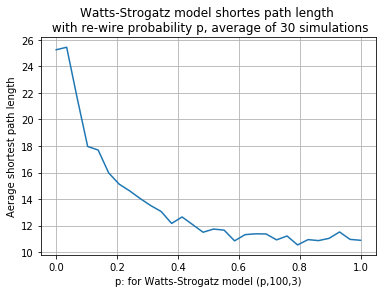

In [138]:
x = np.linspace(0,1,n_probs)
plt.plot(x,np.mean(Y,axis=0))
plt.ylabel("Aerage shortest path length")
plt.xlabel("p: for Watts-Strogatz model (p,{0},{1})".format(100,3))
plt.title("Watts-Strogatz model shortes path length \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()

plt.savefig("WS shortest path",bbpx_inches='tight')

In [134]:
Y[0]

array([25.25252525, 18.94545455, 26.18565657, 20.78464646, 15.32464646,
       15.36020202, 15.02989899, 12.89373737, 17.28383838, 16.10949495,
       16.86787879, 14.09353535, 10.5820202 , 15.10525253, 11.86161616,
       11.29111111, 13.28262626,  9.33353535, 10.12525253, 11.31313131,
        9.53414141,  9.75515152, 10.3569697 , 10.76020202, 10.8820202 ,
       14.18989899, 11.65212121, 10.08363636,  9.16707071, 10.40909091])

In [10]:
n_iterations=30
n_probs=30
Time = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    Time[i,:] = sim_er(n_probs)

Iteration done!
Iteration time:  0.724  seconds
Iteration done!
Iteration time:  0.632  seconds
Iteration done!
Iteration time:  0.669  seconds
Iteration done!
Iteration time:  0.61  seconds
Iteration done!
Iteration time:  0.615  seconds
Iteration done!
Iteration time:  0.71  seconds
Iteration done!
Iteration time:  0.67  seconds
Iteration done!
Iteration time:  0.664  seconds
Iteration done!
Iteration time:  0.619  seconds
Iteration done!
Iteration time:  0.706  seconds
Iteration done!
Iteration time:  0.667  seconds
Iteration done!
Iteration time:  0.733  seconds
Iteration done!
Iteration time:  0.668  seconds
Iteration done!
Iteration time:  0.648  seconds
Iteration done!
Iteration time:  0.632  seconds
Iteration done!
Iteration time:  0.662  seconds
Iteration done!
Iteration time:  0.64  seconds
Iteration done!
Iteration time:  0.716  seconds
Iteration done!
Iteration time:  0.633  seconds
Iteration done!
Iteration time:  0.838  seconds
Iteration done!
Iteration time:  0.702  seco

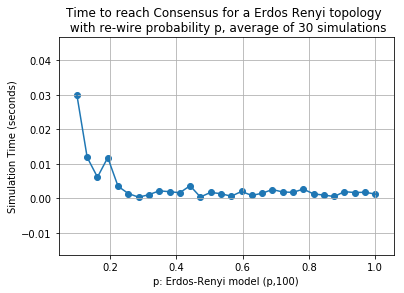

In [11]:
plt.scatter(np.linspace(0.1,1,len(Time[0])),np.mean(Time,axis=0))
plt.plot(np.linspace(0.1,1,len(Time[0])),np.mean(Time,axis=0))
plt.ylabel("Simulation Time (seconds)")
plt.xlabel("p: Erdos-Renyi model (p,{0})".format(100))
plt.title("Time to reach Consensus for a Erdos Renyi topology \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()

plt.savefig("ER-Consensus time",bbpx_inches='tight')

Results_er_30 = {"Time":Time, "Prob": np.linspace(0.1,1,len(Time[0]))}
pickle.dump(Results_er_30, open("er_30","wb"))

In [60]:
n_iterations=30
n_probs=30
Time = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    Time[i,:] = sim_ws_rt(n_probs)

Iteration done!
Iteration time:  164.24  seconds
Iteration done!
Iteration time:  157.294  seconds
Iteration done!
Iteration time:  156.813  seconds
Iteration done!
Iteration time:  156.842  seconds
Iteration done!
Iteration time:  155.736  seconds
Iteration done!
Iteration time:  155.649  seconds
Iteration done!
Iteration time:  155.401  seconds
Iteration done!
Iteration time:  156.427  seconds
Iteration done!
Iteration time:  156.274  seconds
Iteration done!
Iteration time:  155.424  seconds
Iteration done!
Iteration time:  155.509  seconds
Iteration done!
Iteration time:  155.982  seconds
Iteration done!
Iteration time:  155.713  seconds
Iteration done!
Iteration time:  156.134  seconds
Iteration done!
Iteration time:  156.208  seconds
Iteration done!
Iteration time:  155.732  seconds
Iteration done!
Iteration time:  155.984  seconds
Iteration done!
Iteration time:  155.763  seconds
Iteration done!
Iteration time:  156.101  seconds
Iteration done!
Iteration time:  155.231  seconds
I

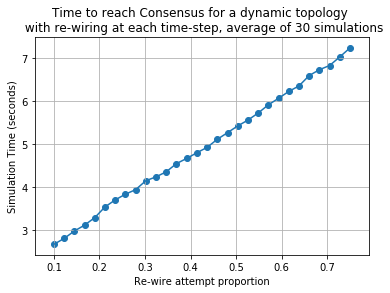

In [67]:
plt.scatter(np.linspace(0.1,0.75,len(Time[0])),np.mean(Time,axis=0))
plt.plot(np.linspace(0.1,0.75,len(Time[0])),np.mean(Time,axis=0))
plt.ylabel("Simulation Time (seconds)")
plt.xlabel("Re-wire attempt proportion")
plt.title("Time to reach Consensus for a dynamic topology \n with re-wiring at each time-step, average of {0} simulations".format(n_iterations))
plt.grid()


plt.savefig("rt ws Consensus time",bbpx_inches='tight')

Results_ws_30_rt = {"Time":Time, "Prob": np.linspace(0.1,0.75,len(Time[0]))}
pickle.dump(Results_ws_30_rt, open("ws_30_rt","wb"))

In [13]:
n_iterations=30
n_probs=30
F = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    F[i,:] = ws_fiedler(n_probs)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


Iteration done!
Iteration time:  0.427  seconds
Iteration done!
Iteration time:  0.426  seconds
Iteration done!
Iteration time:  0.442  seconds
Iteration done!
Iteration time:  0.392  seconds
Iteration done!
Iteration time:  0.399  seconds
Iteration done!
Iteration time:  0.4  seconds
Iteration done!
Iteration time:  0.41  seconds
Iteration done!
Iteration time:  0.447  seconds
Iteration done!
Iteration time:  0.436  seconds
Iteration done!
Iteration time:  0.43  seconds
Iteration done!
Iteration time:  0.422  seconds
Iteration done!
Iteration time:  0.397  seconds
Iteration done!
Iteration time:  0.416  seconds
Iteration done!
Iteration time:  0.4  seconds
Iteration done!
Iteration time:  0.406  seconds
Iteration done!
Iteration time:  0.525  seconds
Iteration done!
Iteration time:  0.416  seconds
Iteration done!
Iteration time:  0.57  seconds
Iteration done!
Iteration time:  0.393  seconds
Iteration done!
Iteration time:  0.436  seconds
Iteration done!
Iteration time:  0.472  seconds

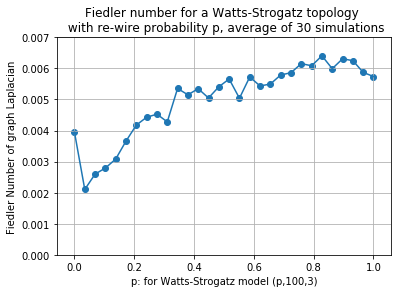

In [17]:
plt.scatter(np.linspace(0,1,len(F[0])),np.mean(F,axis=0))
plt.plot(np.linspace(0,1,len(F[0])),np.mean(F,axis=0))
plt.ylabel("Fiedler Number of graph Laplacian")
plt.xlabel("p: for Watts-Strogatz model (p,{0},{1})".format(100,3))
plt.title("Fiedler number for a Watts-Strogatz topology \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()
plt.ylim(0,0.007)

plt.savefig("ws Consensus fiedler",bbpx_inches='tight')

Results_ws_f = {"fiedler":F, "Prob": np.linspace(0,1,len(Time[0]))}
pickle.dump(Results_ws_f, open("ws_30_f","wb"))